In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
col_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1',
             'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class',]
df = pd.read_csv('magic04.data', names=col_names)
df.head()
df.shape

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


(19020, 11)

In [3]:
df['class'] = (df['class'] == 'g').astype(int)
df['class'].unique()

array([1, 0])

In [4]:
train, valid, test = np.split(df.sample(frac=1, random_state=1), [int(len(df)*.6), int(len(df)*.8)])

train.shape, valid.shape, test.shape

c:\Users\k26ra\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\_core\fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


((11412, 11), (3804, 11), (3804, 11))

In [5]:
def scale_oversample(df, oversample=False):
  from sklearn.preprocessing import StandardScaler
  from imblearn.over_sampling import RandomOverSampler

  X = df[df.columns[:-1]].values
  y = df[df.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X,   y = ros.fit_resample(X, y)

  data = np.hstack((X, y.reshape((-1, 1))))
  return data, X, y


train_scaled, train_X, train_y = scale_oversample(train, oversample=True)
valid_scaled, valid_X, valid_y = scale_oversample(valid)
test_scaled, test_X, test_y = scale_oversample(test)

train_scaled.shape, train_X.shape, train_y.shape
valid_scaled.shape, valid_X.shape, valid_y.shape
test_scaled.shape, test_X.shape, test_y.shape

((14694, 11), (14694, 10), (14694,))

((3804, 11), (3804, 10), (3804,))

((3804, 11), (3804, 10), (3804,))

In [6]:
train.shape
train_scaled.shape

sum(train['class'] == 1)  # gamma
sum(train['class'] == 0)

sum(train_y == 1)  # gamma
sum(train_y == 0)

(11412, 11)

(14694, 11)

7347

4065

np.int64(7347)

np.int64(7347)

# kNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [8]:
knn = KNeighborsClassifier(n_neighbors=101)
knn.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=101)

In [9]:
y_pred = knn.predict(train_X)
print(classification_report(train_y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79      7347
           1       0.77      0.90      0.83      7347

    accuracy                           0.81     14694
   macro avg       0.82      0.81      0.81     14694
weighted avg       0.82      0.81      0.81     14694



In [10]:
y_pred = knn.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1294
           1       0.86      0.89      0.87      2510

    accuracy                           0.83      3804
   macro avg       0.81      0.80      0.81      3804
weighted avg       0.83      0.83      0.83      3804



# Naive Bayes

In [11]:
from sklearn.naive_bayes import GaussianNB

In [12]:
nb = GaussianNB()
nb.fit(train_X, train_y)

GaussianNB()

In [13]:
y_pred = nb.predict(train_X)
print(classification_report(train_y, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.39      0.52      7347
           1       0.59      0.89      0.71      7347

    accuracy                           0.64     14694
   macro avg       0.69      0.64      0.62     14694
weighted avg       0.69      0.64      0.62     14694



In [14]:
y_pred = nb.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.43      0.53      1294
           1       0.75      0.90      0.82      2510

    accuracy                           0.74      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.74      0.72      3804



# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr = LogisticRegression()
lr.fit(train_X, train_y)

LogisticRegression()

In [17]:
y_pred = lr.predict(train_X)
print(classification_report(train_y, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      7347
           1       0.74      0.82      0.78      7347

    accuracy                           0.77     14694
   macro avg       0.77      0.77      0.77     14694
weighted avg       0.77      0.77      0.77     14694



In [18]:
y_pred = lr.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      1294
           1       0.86      0.81      0.83      2510

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM

In [19]:
from sklearn.svm import SVC

In [20]:
svc = SVC()
svc.fit(train_X, train_y)

SVC()

In [21]:
y_pred = svc.predict(train_X)
print(classification_report(train_y, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      7347
           1       0.82      0.90      0.86      7347

    accuracy                           0.85     14694
   macro avg       0.85      0.85      0.85     14694
weighted avg       0.85      0.85      0.85     14694



In [22]:
y_pred = svc.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1294
           1       0.89      0.89      0.89      2510

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks

In [23]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [24]:
def plot_history(history):
  plt.plot(history.history['loss'], color='b', label='loss')
  # plt.plot(history.history['val_loss'], color='r')
  plt.legend()
  plt.show()

  plt.plot(history.history['accuracy'], color='b', label='accuracy')
  # plt.plot(history.history['val_accuracy'], color='r')
  plt.legend()
  plt.show()

In [25]:
nn_model = Sequential([
    Input((10,)),
    Dense(32, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

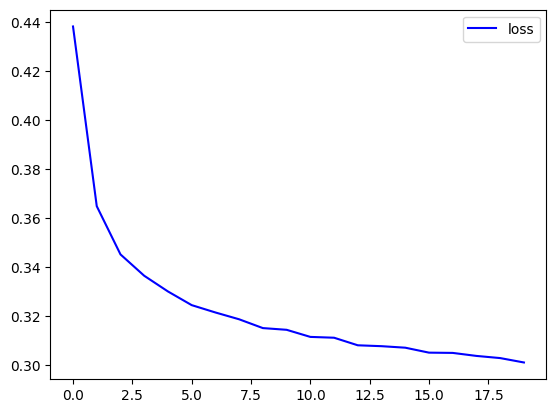

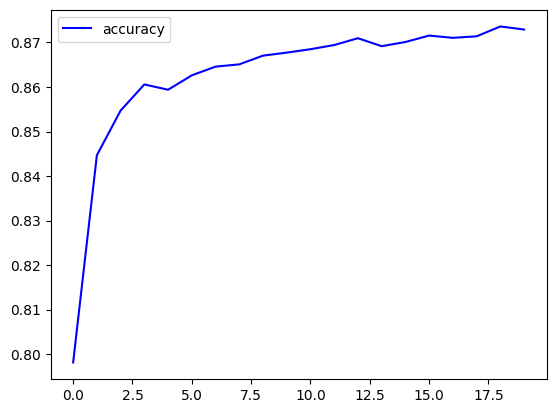

In [26]:
history = nn_model.fit(
    train_X, train_y, epochs=20, batch_size=32, validation_split=0.2, verbose=False
)

plot_history(history)

In [82]:
y_pred = nn_model.predict(test_X)
y_pred = y_pred.ravel()
y_pred = (y_pred >= 0.5).astype(int)

print(test_y[:20])
print(y_pred[:20])

print(classification_report(test_y, y_pred))

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0]
[0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1]
              precision    recall  f1-score   support

           0       0.87      0.73      0.79      1294
           1       0.87      0.94      0.91      2510

    accuracy                           0.87      3804
   macro avg       0.87      0.83      0.85      3804
weighted avg       0.87      0.87      0.87      3804



In [80]:
y_act = np.array([1, 1, 0, 1, 0, 0])
y_pred = np.array([0.98, 0.80, 0.56, 0.12, 0.40, 0.75])
y_pred = (y_pred >= 0.5).astype(int)

accuracy = 3/6
print(f'{accuracy=:.2f}')

precision_1 = 2/4
print(f'{precision_1=:.2f}')

precision_0 = 1/2
print(f'{precision_0=:.2f}')

recall_1 = 2/3
print(f'{recall_1=:.2f}')

recall_0 = 1/3
print(f'{recall_0=:.2f}')

print(classification_report(y_act, y_pred))

accuracy=0.50
precision_1=0.50
precision_0=0.50
recall_1=0.67
recall_0=0.33
              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



## Macro vs Weighted Avg (Example)

Classes: 75 and 50  
Counts: 75 → 6 times, 50 → 2 times  
Mean for 75 = 75  
Mean for 50 = 50

Macro Avg = (75 + 50) / 2 = 62.5  
Weighted Avg = 75*6/8 + 50*2/8 = 68.75